**Author:** Branislav Lacovič  <br> 
email: [branislavlacovic@gmail.com](mailto:branislavlacovic@gmail.com) <br>
jupyter notebook based on [CharFunTool](https://github.com/witkovsky/CharFunTool/tree/master/Examples) by Viktor Witkovský
*** 

**<font size=6 color=gold> Characteristic function (CF) of empirical distribution </font>** 

In [4]:
# devtools::install_github("gajdosandrej/CharFunToolR") 
library(CharFunToolR)

<h2>DIRAC MIXTURE DISTRIBUTION</h2>

`cfE_DiracMixture(t,coefs,weights,cfX)` evaluates the characteristic
 function $\text{cf(t)}$ of the weighted mixture of independent DIRAC variables,
 say $\mathbf{Y}$ (i.e. nonstochastic constants). In particular,
 $$\text{cf}(\mathbf{Y})= \displaystyle\sum_{j=1}^n
 weights[j] * cf\left(coefs[j] * \mathbf{X}_{j}\right),$$ where each $\mathbf{X}_{j}$ represents the Dirac
 random variable concentrated at the constant 1.

Hence, the empirical characteristic function (ECF) of the random sample
$ X_1,...,X_n$ is equally weighted mixture of the characteristic functions
 of the Dirac random variables $X_j$ concentrated at the observed values
 $x_j$, i.e. mixture of CFs given by $\text{cf}_{X_{j}} (t) = e^{itx_j}$, i.e.
  $$\text{cf(t)} = \text{cfE_DiracMixture(t,data,1/n)} = \left(\frac{1}{n}\right)\sum_{j=1}^n e^{itx_j};$$
 where $\text{data} = (x_1,...,x_n)$. 

`cfE_DiracMixture(t,coefs,weights,cf_X)` evaluates the compound
 characteristic function 

$$\text{cf(t)} = \text{cfE_DiracMixture}(-1i*\log(\text{cfX(t)}),\text{coefs, weights})
       = \displaystyle\sum_{j=1}^n weights[j] * cfX(t)^{coefs[j]};$$

 where `cfX` is function handle of the characteristic function $\text{cfX(t)}$ of the
 random variable $\mathbf{X}$ (as e.g. another empirical CF based on observed data of
 $\mathbf{X}$). 

Syntax

$\textbf{a) EXAMPLE: Empirical CF - a weighted mixture of Dirac RVs}$

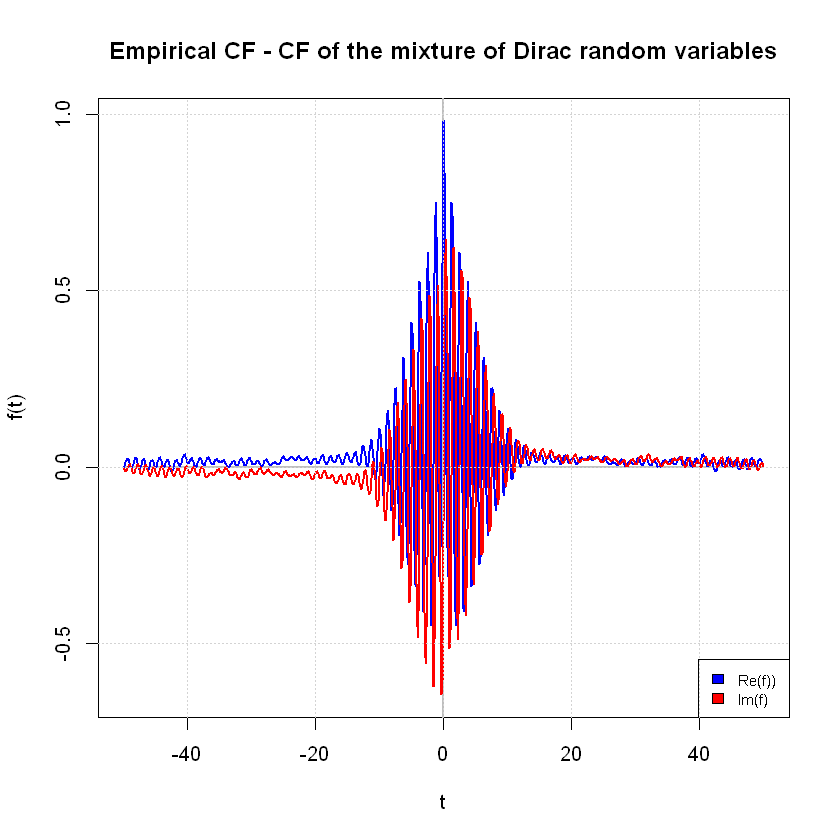

In [5]:
set.seed(101)
n <- 1000
data <- c(rnorm(3 * n, 5, 0.2), rt(n, 3), rchisq(n, 1))
t <- seq(-50, 50, length.out = 2 ^ 10)
weights <- 1 / length(data)
plotReIm(function(t)
        cfE_DiracMixture(t, data, weights),
        t,
        title = "Empirical CF - CF of the mixture of Dirac random variables")


$\textbf{b) EXAMPLE: Convolution of the ECF and the Gaussian kernel}$

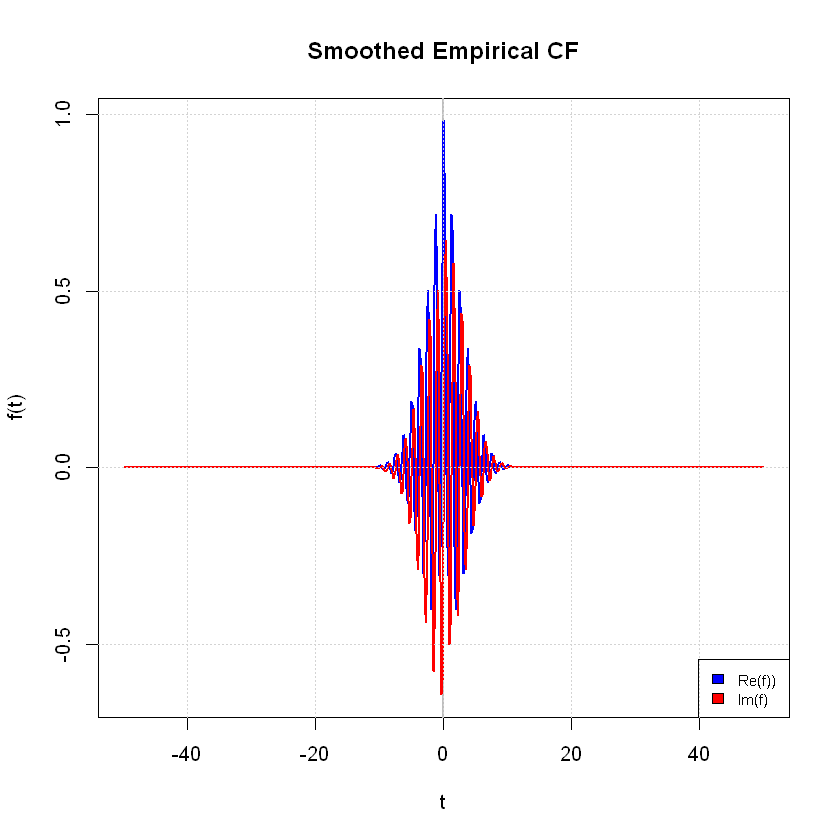

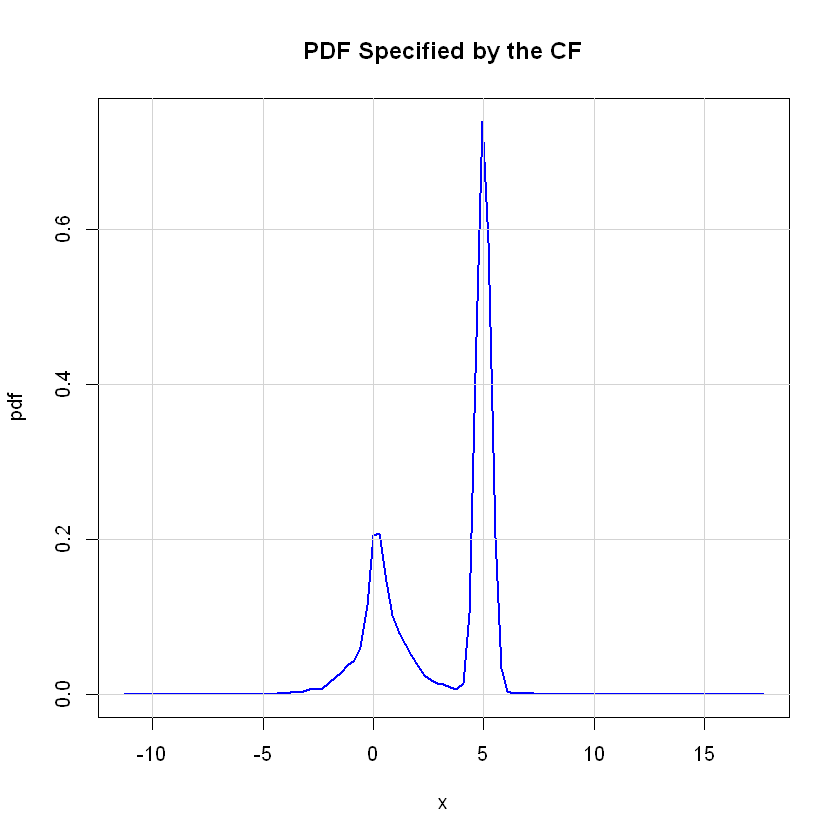

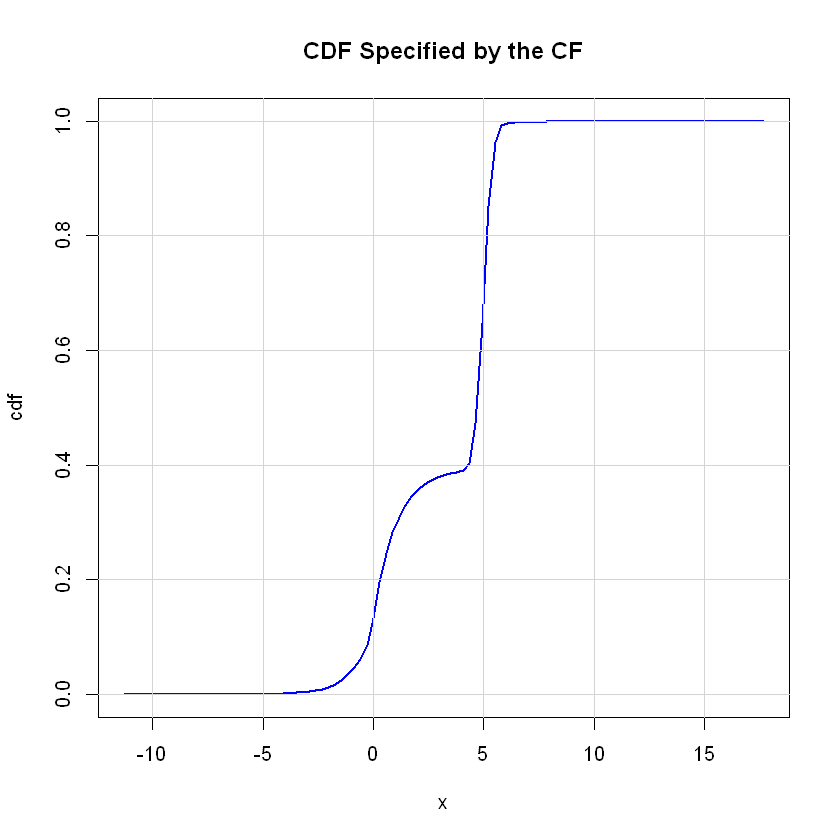

In [6]:
set.seed(101)
n <- 1000
data <- c(rnorm(3 * n, 5, 0.2), rt(n, 3), rchisq(n, 1))
bandwidth <- 0.25
cf_DATA   <- function(t) {
        cfE_DiracMixture(t, data, weights)}
cf_KERNEL <- function(t) {
        exp(-(bandwidth * t) ^ 2 / 2)}
cf <- function(t) {
        cf_DATA(t) * cf_KERNEL(t)}
t <- seq(-50, 50, length.out = 2 ^ 10)
plotReIm(cf, t, title = "Smoothed Empirical CF")
result <- cf2DistGP(cf)


$\textbf{c) EXAMPLE: CF, PDF, CDF of the compound Empirical-Empirical distribution}$

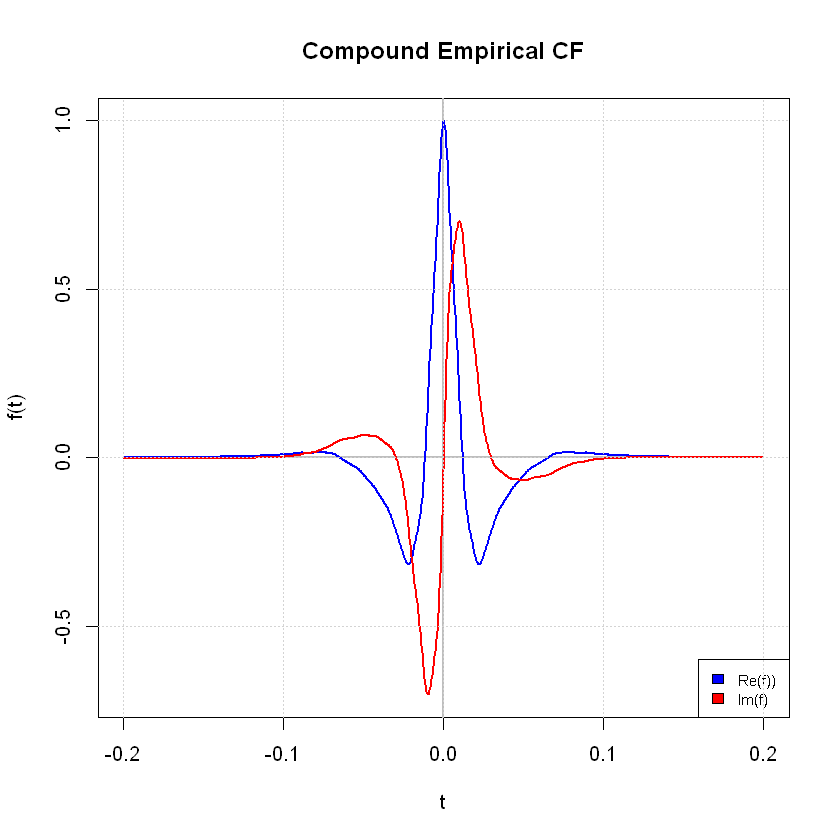

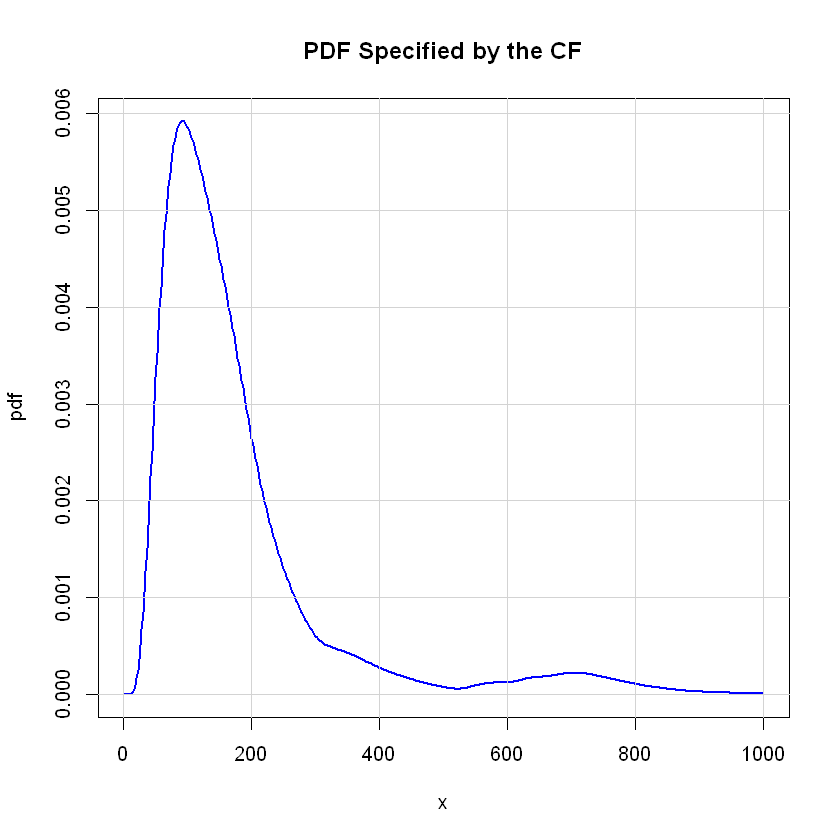

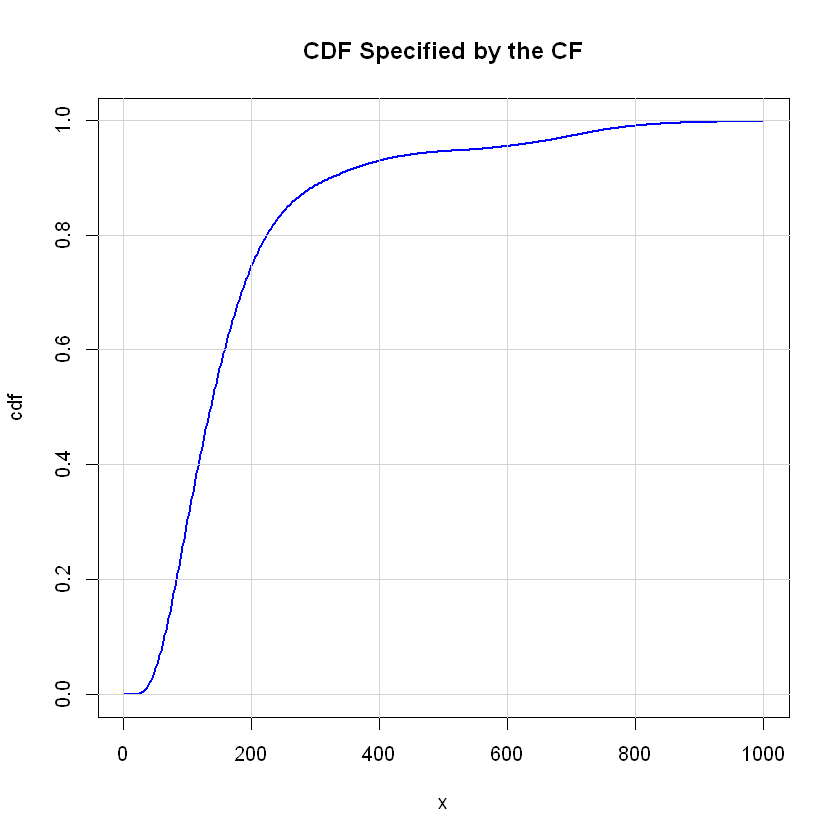

In [7]:
set.seed(101)
lambda <- 25
nN <- 10
Ndata <- rpois(nN, lambda)

mu <- 0.1
sigma <- 2
nX <- 1500
Xdata <- rlnorm(nX, mu, sigma)
cfX <- function(t)
        cfE_DiracMixture(t, Xdata, 1 / nX)
cf  <- function(t)
        cfE_DiracMixture(t, Ndata, 1 / nN, cfX)
t <- seq(-0.2, 0.2, length.out = 2 ^ 10)
plotReIm(cf, t, title = "Compound Empirical CF")

x <- seq(0, 1000, length.out = 501)
prob <- c(0.9, 0.95)
options <- list()
options$N <- 2 ^ 10
options$SixSigmaRule <- 10
result <- cf2DistGP(cf, x, prob, options)


***

 # <font color=brown> References </font>

* WITKOVSKY V., WIMMER G., DUBY T. (2017). [Computing the aggregate
  loss distribution based on numerical inversion of the compound empirical
  characteristic function of frequency and severity](https://arxiv.org/abs/1701.08299). arXiv preprint
  arXiv:1701.08299.     